# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : norman wells
Processing Record 2 of Set 1 : qaanaaq
Processing Record 3 of Set 1 : busselton
Processing Record 4 of Set 1 : hilo
Processing Record 5 of Set 1 : pisco
Processing Record 6 of Set 1 : estevan
Processing Record 7 of Set 1 : chokurdakh
Processing Record 8 of Set 1 : thunder bay
Processing Record 9 of Set 1 : changping
City not found. Skipping...
Processing Record 10 of Set 1 : marawi
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : mataura
Processing Record 13 of Set 1 : faanui
Processing Record 14 of Set 1 : nowy dwor gdanski
Processing Record 15 of Set 1 : pevek
Processing Record 16 of Set 1 : san carlos de bariloche
Processing Record 17 of Set 1 : cape town
City not found. Skipping...
Processing Record 18 of Set 1 : lagoa
Processing Record 19 of Set 1 : avera
Processing Record 20 of Set 1 : kloulklubed
Processing Record 21 of Set 1 : khatanga
Processing Record 22 

Processing Record 38 of Set 4 : peleduy
Processing Record 39 of Set 4 : hirado
Processing Record 40 of Set 4 : wajima
Processing Record 41 of Set 4 : codrington
Processing Record 42 of Set 4 : hobyo
Processing Record 43 of Set 4 : san isidro
Processing Record 44 of Set 4 : olafsvik
Processing Record 45 of Set 4 : esperance
Processing Record 46 of Set 4 : saint-philippe
Processing Record 47 of Set 4 : bengkulu
Processing Record 48 of Set 4 : new norfolk
Processing Record 49 of Set 4 : aransas pass
Processing Record 50 of Set 4 : nanortalik
Processing Record 0 of Set 5 : stykkisholmur
Processing Record 1 of Set 5 : alofi
Processing Record 2 of Set 5 : namatanai
Processing Record 3 of Set 5 : laguna
Processing Record 4 of Set 5 : yamada
Processing Record 5 of Set 5 : sibolga
Processing Record 6 of Set 5 : klaeng
Processing Record 7 of Set 5 : vardo
City not found. Skipping...
Processing Record 8 of Set 5 : gumdag
Processing Record 9 of Set 5 : saskylakh
Processing Record 10 of Set 5 : pak

Processing Record 24 of Set 8 : padang
Processing Record 25 of Set 8 : egvekinot
Processing Record 26 of Set 8 : epe
Processing Record 27 of Set 8 : puerto escondido
Processing Record 28 of Set 8 : binzhou
Processing Record 29 of Set 8 : roma
Processing Record 30 of Set 8 : fort nelson
Processing Record 31 of Set 8 : spencer
City not found. Skipping...
Processing Record 32 of Set 8 : fengzhen
Processing Record 33 of Set 8 : clyde river
Processing Record 34 of Set 8 : bela vista
Processing Record 35 of Set 8 : mana
Processing Record 36 of Set 8 : sofiyivka
Processing Record 37 of Set 8 : santa rosa
Processing Record 38 of Set 8 : khazar
Processing Record 39 of Set 8 : kahului
Processing Record 40 of Set 8 : roswell
Processing Record 41 of Set 8 : ivanteyevka
Processing Record 42 of Set 8 : jasper
Processing Record 43 of Set 8 : orlik
Processing Record 44 of Set 8 : korla
Processing Record 45 of Set 8 : yenagoa
Processing Record 46 of Set 8 : bondo
Processing Record 47 of Set 8 : kaeo
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [23]:
# Count data
weather_dict.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [24]:
# show the top of the dataframe
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Norman Wells,20,CA,1611901852,67,65.2820,-126.8329,-36.40,3.44
1,Qaanaaq,0,GL,1611901852,62,77.4840,-69.3632,-14.01,6.15
2,Busselton,0,AU,1611901852,43,-33.6500,115.3333,84.99,3.00
3,Hilo,75,US,1611901852,64,19.7297,-155.0900,73.40,9.08
4,Pisco,0,PE,1611901853,78,-13.7000,-76.2167,69.80,9.22
...,...,...,...,...,...,...,...,...,...
546,Governador Valadares,2,BR,1611901991,91,-18.8511,-41.9494,67.32,0.60
547,Songyang,100,CN,1611901829,33,34.4553,113.0281,53.96,5.70
548,El Rosario,0,MX,1611901992,94,24.2556,-107.1828,62.01,3.00
549,Senno,100,RU,1611901992,93,59.5336,33.9167,28.99,4.00


In [26]:
# Save city data into a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

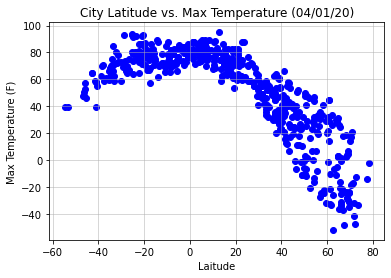

In [35]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], color = "blue")

# Set title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

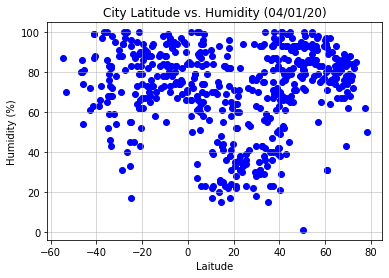

In [36]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], color = "blue")

# Set title
plt.title("City Latitude vs. Humidity (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

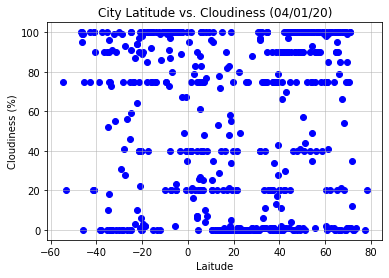

In [37]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], color = "blue")

# Set title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

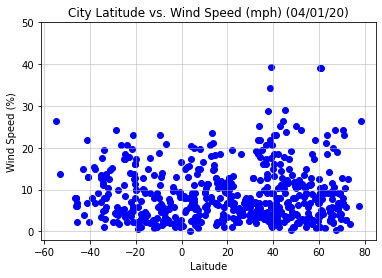

In [38]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], color = "blue")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [45]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


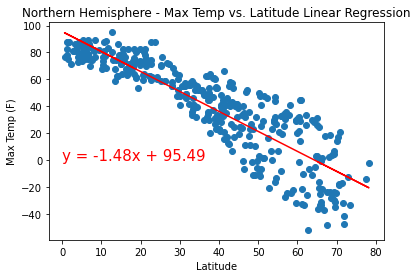

In [46]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong negative correlation between lattitude and max temp for the northern hemisphere. The higher the latitude, the lower the temp.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.59


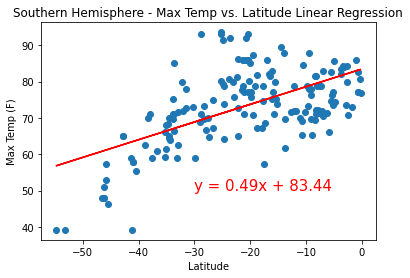

In [47]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and max temp in the southern hemisphere. The greater the latitude, the higher the max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.34


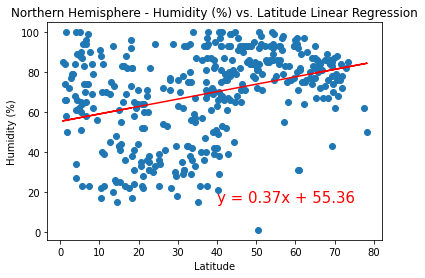

In [48]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

This graph shows there is a positive correlation between latitude and humidity for the northern hemisphere. The higher the latitiude, the greater the humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.14


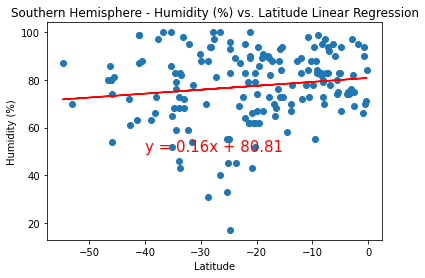

In [49]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a positive correlation between the latitude and humidity in the southern hemisphere. But it is a very small correlation. The % humidity stays fairly consistant thoughout the latitudes.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.25


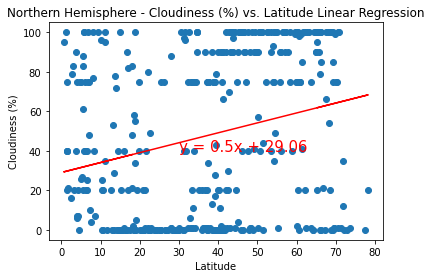

In [50]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and cloudiness for the northern hemisphere. But it is only at 0.5, which is a very small slope and a small correlation. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.16


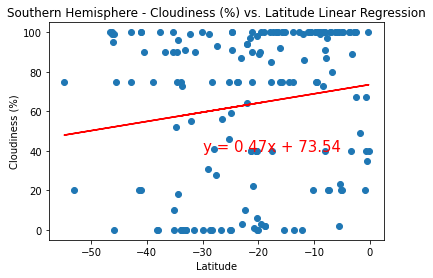

In [51]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and cloudiness for the southern hemisphere. Once again, it is less than 0.5, at 0.47, making it a very slight positive correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04


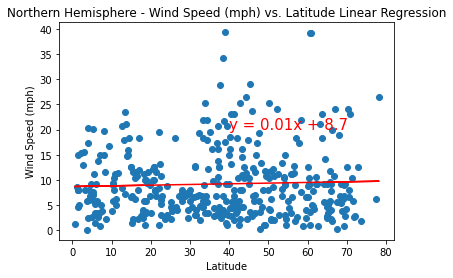

In [52]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The slope is at 0.01, which is very very slightly positive of a correlation between wind speed and latitude in the northern hemisphere. The wind stays relativly the same throughout the latitudes. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


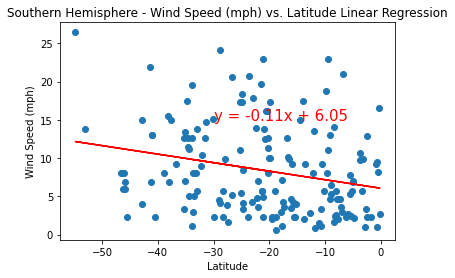

In [53]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The slope is at -0.11, which is very very slightly negative of a correlation between wind speed and latitude in the southern hemisphere. The wind stays relativly the same throughout the latitudes. 